# Analyse des résultats

Importation des librairies nécessaires (pandas: importer et gérer des tableaux de données, seaborn et matplotlib pour les graphiques)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

Fonctions


In [59]:
def create_df(string_location_file, string_file_name, sheet_name):
    df_testType = pd.read_excel(string_location_file + string_file_name, sheet_name=sheet_name,skiprows=2)
    return df_testType

def import_data_from_excel(string_location_file, string_file_name):
    dico_df={}
    for test_type in ["Action","4_words","list","3_infos"]:
        dico_df[test_type]=create_df(string_location_file, string_file_name, test_type)
    return dico_df

def calculatePercentage(df, column, valueToCount, totalForPercentage):
    occurenceValueToCountInCol = len(df[df[column].str.lower().isin([valueToCount])])
    percent=occurenceValueToCountInCol*100/totalForPercentage
    return percent

def savePercentage (df_whereSaved, columnCritere, valueCritere, df_percent, columnPercent, valueToCount, totalForPercentage, nameNewCol):
    float_percent = calculatePercentage(df_percent, columnPercent, valueToCount, totalForPercentage)
    df_whereSaved.loc[ (df_whereSaved[columnCritere]==valueCritere), nameNewCol] = float_percent
    return

def createTemporaryDf(df_input,string_colCritere1, valueCritere1, string_colCritere2, valueCritere21, valueCritere22, critere2=False):
    lst_df_temp=[]

    df_temp1=df_input[df_input[string_colCritere1]==valueCritere1]
    lst_df_temp.append(df_temp1)

    if critere2:
        df_temp21=df_temp1[df_temp1[string_colCritere2]==valueCritere21]
        df_temp22=df_temp1[df_temp1[string_colCritere2]==valueCritere22]
        lst_df_temp.append(df_temp21)
        lst_df_temp.append(df_temp22)

    return lst_df_temp

#ecrase la premiere fonction savePercentage?
def savePercentage (df_whereSaved, string_col1, valueCol1, string_col2, valueCol2, string_nameNewCol, float_percent):
    df_whereSaved.loc[ (df_whereSaved[string_col1]==valueCol1) & (df_whereSaved[string_col2]==valueCol2),string_nameNewCol] = float_percent
    return

Initialisation: variables globale (temporaires, à supprimer dès que possible) et chemin d'acces au fichier.

In [20]:
#location=
file_name="Tests results.xlsx"
nbVideos=9
nbRep=5

Importation des données dans des data frame et formatage pour être facilement utilisées.

In [46]:
#dico_df=import_data_from_excel("C:/Users/camil/Documents/PERSO/COURS/H-KA/COURS/MechaSysteme/Project/", "Tests results.xlsx")
dico_df=import_data_from_excel("/Users/mariewinkler/Documents/HKA/S2/Mechatronische Systeme/Projekt/", "Tests results.xlsx")
df_action=dico_df["Action"]
df_action["test_type"]="Action"

df_4Words=dico_df["4_words"]
df_4Words["test_type"]="4Words"

df_list=dico_df["list"]
df_list["test_type"]="list"

df_3Infos=dico_df["3_infos"]
df_3Infos["test_type"]="3Infos"

df_poe=pd.concat([df_action[df_action["LLM"]=="Poe"],df_4Words[df_4Words["LLM"]=="Poe"],
                 df_list[df_list["LLM"]=="Poe"],df_3Infos[df_3Infos["LLM"]=="Poe"]],join="inner", ignore_index=True)
df_hf=pd.concat([df_action[df_action["LLM"]=="Hugging Faces"],df_4Words[df_4Words["LLM"]=="Hugging Faces"],
                 df_list[df_list["LLM"]=="Hugging Faces"],df_3Infos[df_3Infos["LLM"]=="Hugging Faces"]],join="inner", ignore_index=True)



Lignes de code pour tracer les graphiques. Une erreur et de toute façon, la présentation est moche. Il faut faire des fonctions.

dict_keys(['Action', '4_words', 'list', '3_infos'])
Action
0
4_words
1
list
    Test  LLM  Video                                           Answer  \
0      1  Poe      1                           The person is walking.   
2      1  Poe      5                           The person is walking.   
4      1  Poe     10                           The person is running.   
6      1  Poe     14                  The person is riding a scooter.   
8      1  Poe     19                     The person is riding a bike.   
10     1  Poe     23               The person is jumping on the spot.   
12     1  Poe     28                           The person is falling.   
14     1  Poe     32                           The person is running.   
16     1  Poe      7  The person in the video is jumping on the spot.   

   Action ok? Answer in the list? Action predicted Remark test_type  \
0         yes                 yes             walk    NaN      list   
2          no                 yes             walk 

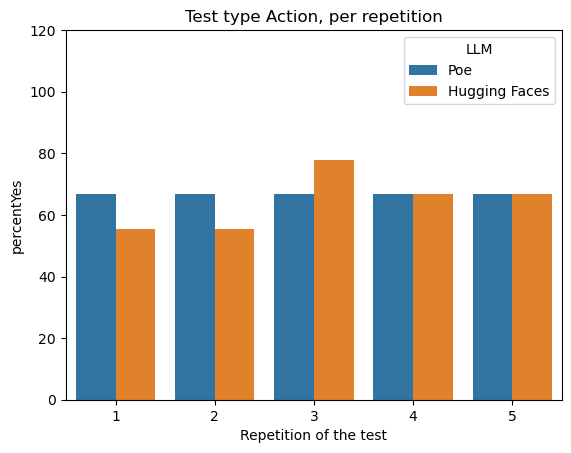

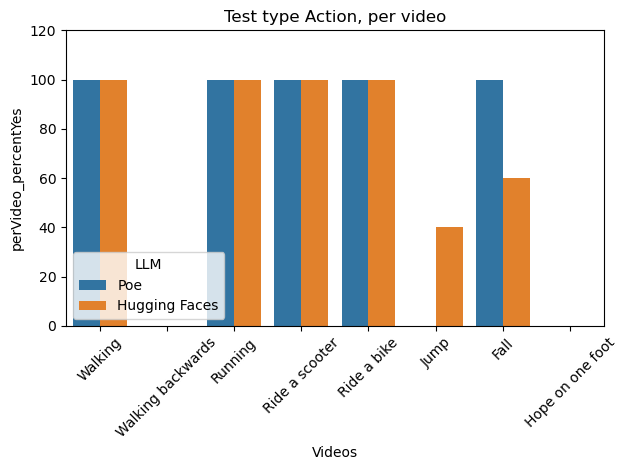

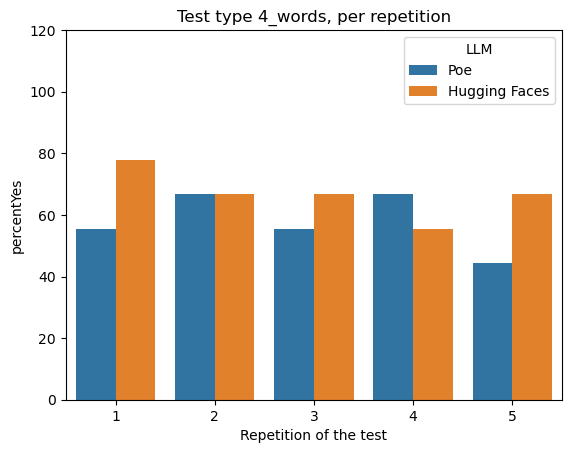

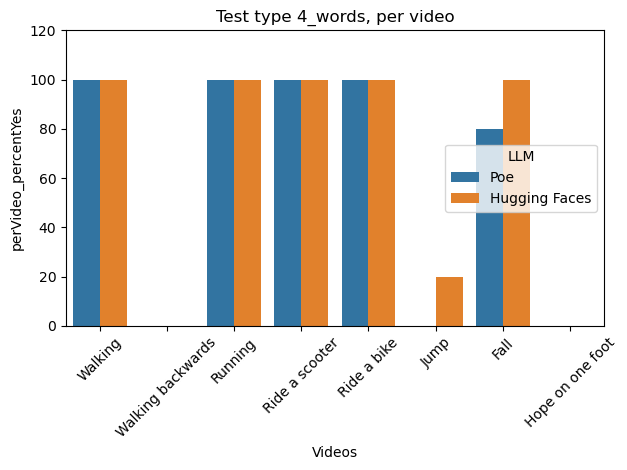

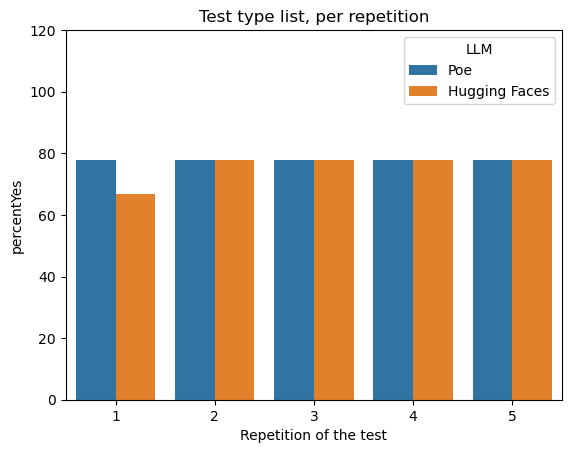

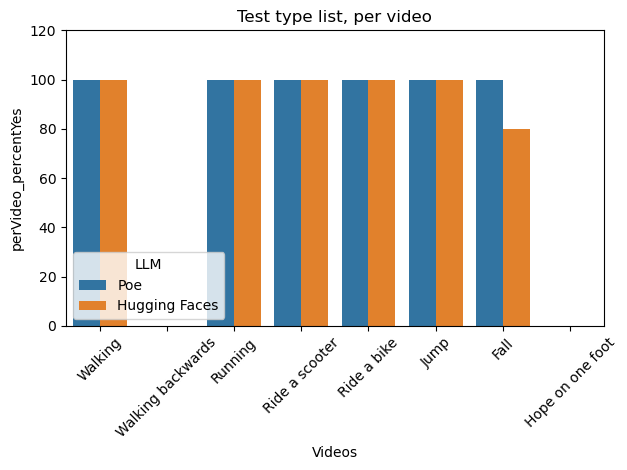

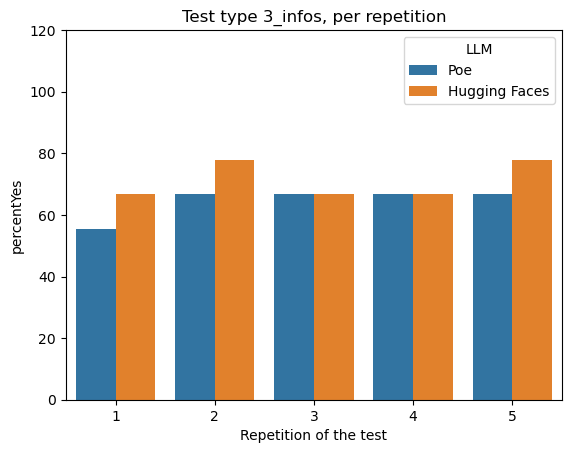

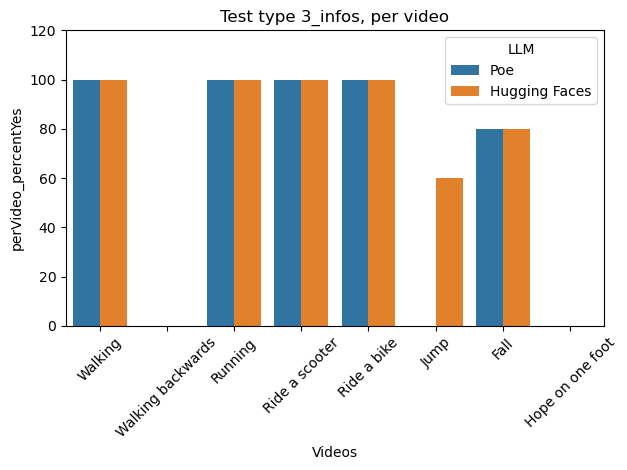

In [61]:
from matplotlib.ticker import MultipleLocator

# Dictionnaire qui mappe numéro de vidéo -> nom de la vidéo (à adapter selon tes données)
video_names = {
    1: "Walking",
    5: "Walking backwards",
    10: "Running",
    14: "Ride a scooter",
    19: "Ride a bike",
    23: "Jump",
    28: "Fall",
    32: "Hope on one foot"
}

i = 0
print(dico_df.keys())
for test_type in list(dico_df.keys()):
    df_test = dico_df[test_type]
    #print(df_test)
    name = list(dico_df.keys())[i]
    print(name)

    # Calculs et sauvegarde des pourcentages par répétition
    for rep in range(1, 6):
        lst = createTemporaryDf(df_test, "Test", rep, "LLM", "Poe", "Hugging Faces", critere2=True)
        if(test_type == "list" and rep == 1 ):
            print(lst[1])
        percentPoe = calculatePercentage(lst[1], 'Action ok?', "yes", nbVideos)
        percentHF = calculatePercentage(lst[2], 'Action ok?', "yes", nbVideos)

        savePercentage(df_test, "Test", rep, "LLM", "Poe", "percentYes", percentPoe)
        savePercentage(df_test, "Test", rep, "LLM", "Hugging Faces", "percentYes", percentHF)

    # Graphique par répétition (barres côte à côte)
    plt.figure()
    plt.title(f"Test type {name}, per repetition")
    sns.barplot(data=df_test, x="Test", y="percentYes", hue="LLM", dodge=True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_ylim(0, 120)
    plt.xlabel("Repetition of the test")

    # Ajout de la colonne "Video_name" qui remplace numéro par nom
    df_test["Video_name"] = df_test["Video"].map(video_names)

    # Calculs et sauvegarde des pourcentages par vidéo
    for video in df_test["Video"].unique():
        lst = createTemporaryDf(df_test, "Video", video, "LLM", "Poe", "Hugging Faces", critere2=True)

        percentPoe = calculatePercentage(lst[1], 'Action ok?', "yes", nbRep)
        percentHF = calculatePercentage(lst[2], 'Action ok?', "yes", nbRep)

        savePercentage(df_test, "Video", video, "LLM", "Poe", "perVideo_percentYes", percentPoe)
        savePercentage(df_test, "Video", video, "LLM", "Hugging Faces", "perVideo_percentYes", percentHF)

    # Graphique par vidéo avec noms lisibles
    plt.figure()
    plt.title(f"Test type {name}, per video")
    sns.barplot(data=df_test, x="Video_name", y="perVideo_percentYes", hue="LLM", dodge=True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))  # graduations tous les 1
    ax.set_ylim(0, 120)
    plt.xlabel("Videos")
    plt.xticks(rotation=45)  # rotation pour lisibilité
    plt.tight_layout()

    print(i)
    i += 1



Brouillon


In [ ]:
# def prepareDf(df_testType, x, y, hue, perRep=True, perVideo=False):
#     lst_rep=[k for k in range(1,6)]
#     lst_Video=df_testType["Video"].unique()

#     if perRep:
#         for rep in lst_rep:
#             lst_tempDF=createTemporaryDf(df_testType,"Test",rep,"LLM","Poe","Hugging Faces", critere2=True)

#             percentPoe = calculatePercentage(lst_tempDF[1],'Action ok?', "Yes", nbVideos)
#             percentHF = calculatePercentage(lst_tempDF[2],'Action ok?', "Yes", nbVideos)

#             savePercentage (df_action,"Test",rep,"LLM", "Poe", "percentYes", percentPoe)
#             savePercentage (df_action,"Test",rep,"LLM", "Hugging Faces", "percentYes", percentHF)

#     return

# df_byrep = df_action[df_action["Test"]==rep]
    # df_byrep_bypoe=df_byrep[df_byrep["LLM"]=="Poe"]
    # df_byrep_byhf=df_byrep[df_byrep["LLM"]=="Hugging Faces"]
    # occurencepoeYes = len(df_byrep_bypoe[df_byrep_bypoe['Action ok?'].isin(["Yes"])])
    # occurencehfYes = len(df_byrep_byhf[df_byrep_byhf['Action ok?'].isin(["Yes"])])
    # print(occurencepoeYes)
    # print(occurencehfYes)
    # df_action.loc[ (df_action["Test"]==rep) & (df_action["LLM"]=="Poe"),"occurenceYes"] = occurencepoeYes
    # df_action.loc[ (df_action["Test"]==rep) & (df_action["LLM"]=="Hugging Faces"),"occurenceYes"] = occurencehfYes